In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

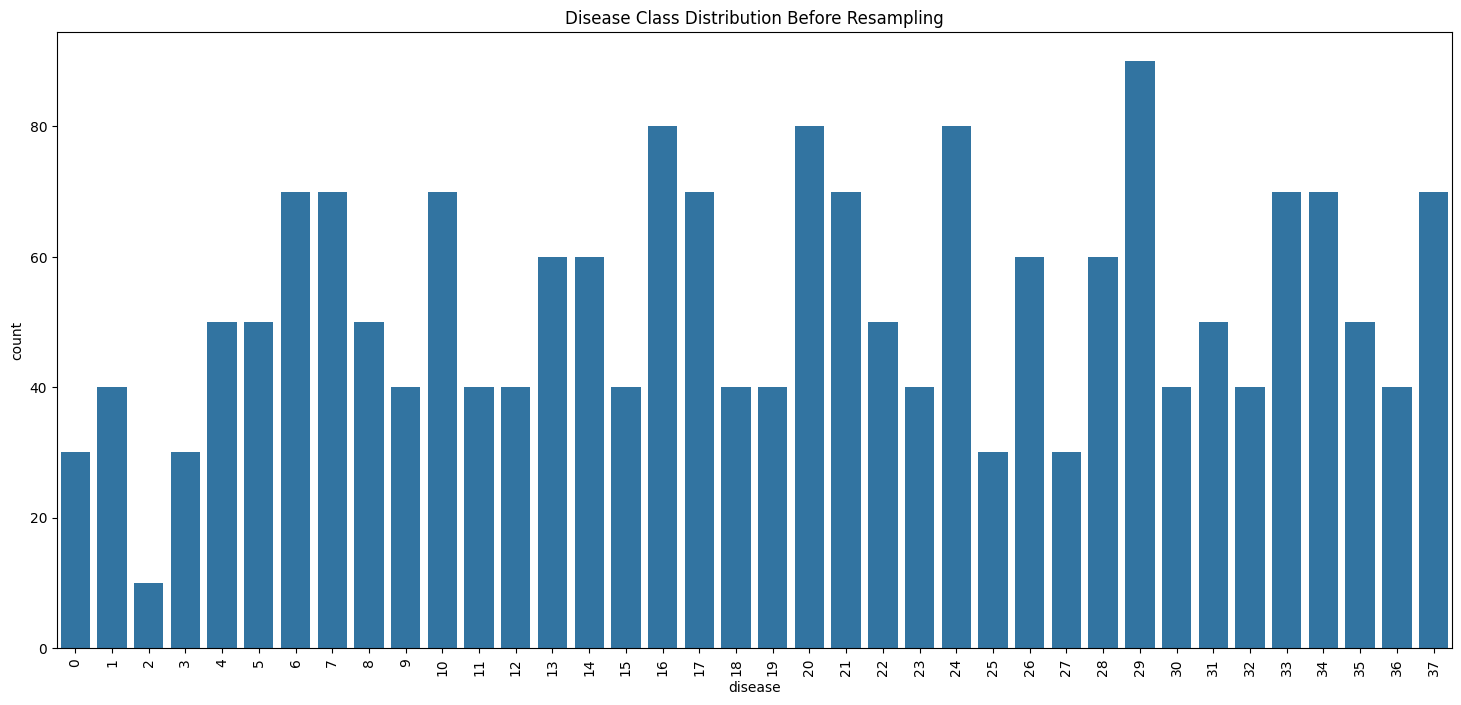

Resampled Class Distribution:
 disease
29    90
20    90
16    90
24    90
7     90
17    90
34    90
10    90
37    90
6     90
33    90
21    90
26    90
13    90
28    90
14    90
8     90
31    90
35    90
22    90
5     90
4     90
18    90
23    90
1     90
12    90
30    90
32    90
11    90
9     90
36    90
15    90
19    90
27    90
3     90
25    90
0     90
2     90
Name: count, dtype: int64


In [ ]:
data = pd.read_csv('files/improved_disease_dataset.csv')

encoder = LabelEncoder()
data["disease"] = encoder.fit_transform(data["disease"])

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

plt.figure(figsize=(18, 8))
sns.countplot(x=y)
plt.title("Disease Class Distribution Before Resampling")
plt.xticks(rotation=90)
plt.show()

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

print("Resampled Class Distribution:\n", pd.Series(y_resampled).value_counts())

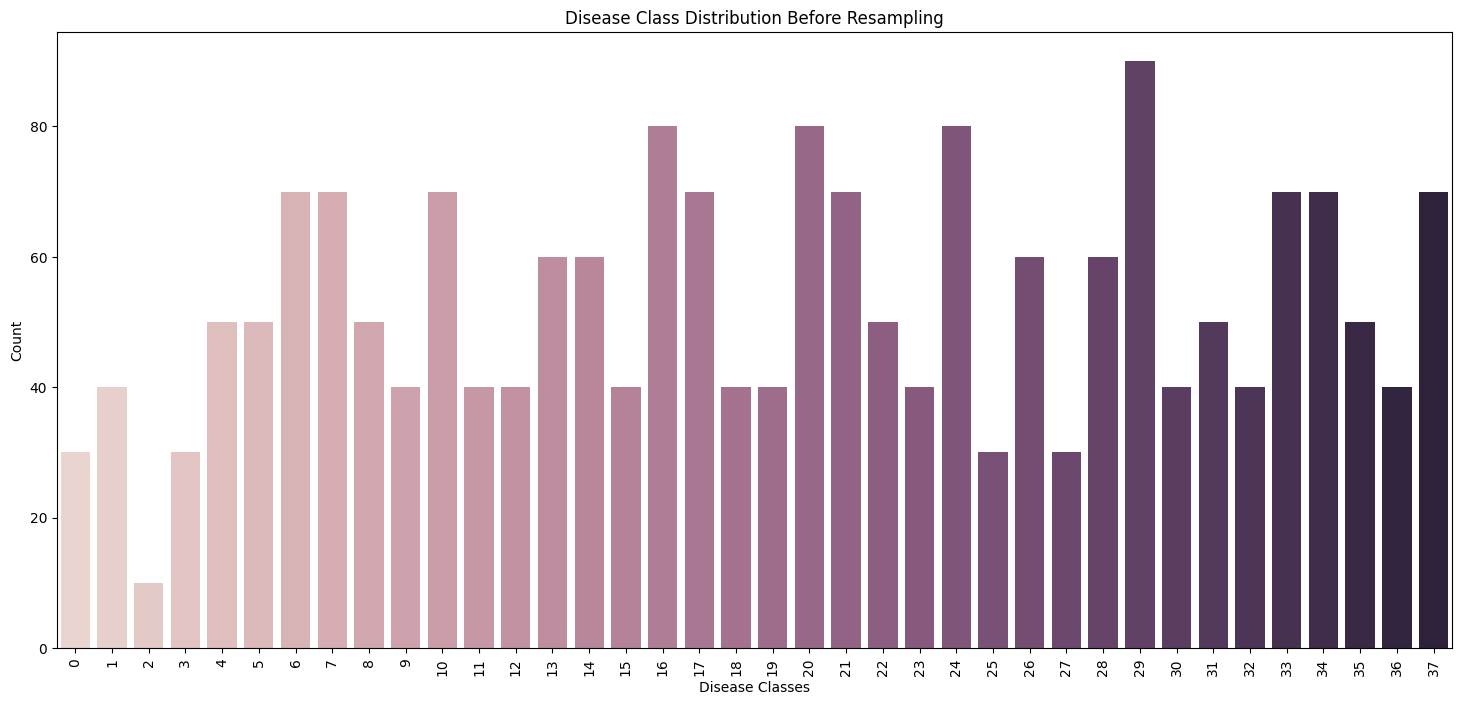

Resampled Class Distribution:
 disease
29    90
20    90
16    90
24    90
7     90
17    90
34    90
10    90
37    90
6     90
33    90
21    90
26    90
13    90
28    90
14    90
8     90
31    90
35    90
22    90
5     90
4     90
18    90
23    90
1     90
12    90
30    90
32    90
11    90
9     90
36    90
15    90
19    90
27    90
3     90
25    90
0     90
2     90
Name: count, dtype: int64


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

# Load the dataset
try:
    data = pd.read_csv('improved_disease_dataset.csv')
except FileNotFoundError:
    print("Error: The file 'improved_disease_dataset.csv' was not found.")
    exit(1)

# Initialize LabelEncoder
encoder = LabelEncoder()

# Check if 'disease' column exists
if 'disease' in data.columns:
    data['disease'] = encoder.fit_transform(data['disease'])
else:
    print("Error: 'disease' column not found in the dataset.")
    exit(1)

# Split features and target
X = data.drop(columns=['disease'])  # More explicit than iloc
y = data['disease']

# Plot class distribution before resampling
plt.figure(figsize=(18, 8))
sns.countplot(x=y, hue=y, legend=False)  # Updated for newer Seaborn versions
plt.title("Disease Class Distribution Before Resampling")
plt.xticks(rotation=90)
plt.xlabel("Disease Classes")
plt.ylabel("Count")
plt.show()

# Apply RandomOverSampler
ros = RandomOverSampler(random_state=42)
try:
    X_resampled, y_resampled = ros.fit_resample(X, y)
except ValueError as e:
    print(f"Error during resampling: {e}")
    exit(1)

# Display resampled class distribution
print("Resampled Class Distribution:\n", pd.Series(y_resampled).value_counts())